Question 3-5

Miles Voenell (Student 32)

In [1]:
import json
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import jsonlines
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

json_file_path = 'train.json'  

data = []
with jsonlines.open(json_file_path) as reader:
    for obj in reader:
        data.append(obj) 

df = pd.DataFrame(data)

text_data = [entry['Tweet'] for entry in data]
class_love = [entry['love'] for entry in data] 
class_anger = [entry['anger'] for entry in data]
class_sadness = [entry['sadness'] for entry in data]
class_surprise = [entry['surprise'] for entry in data]

count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(text_data)
count_shape = count_matrix.shape
print(f"CountVectorizer - Dimensionality: {count_shape}")

scaler_count = StandardScaler(with_mean=False) 
count_scaled = scaler_count.fit_transform(count_matrix)
pca = PCA(n_components=2)
count_matrix = count_scaled.toarray()
count_pca = pca.fit_transform(count_matrix)

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)
tfidf_shape = tfidf_matrix.shape
print(f"TfidfVectorizer - Dimensionality: {tfidf_shape}")

scaler = StandardScaler(with_mean=False) 
tfidf_scaled = scaler.fit_transform(tfidf_matrix)
pca = PCA(n_components=2)
tfidf_matrix = tfidf_scaled.toarray()
tfidf_pca = pca.fit_transform(tfidf_matrix)




CountVectorizer - Dimensionality: (3000, 9638)
TfidfVectorizer - Dimensionality: (3000, 9638)


Scatter Plots of the 2D Points:

None of the classes are visually separable

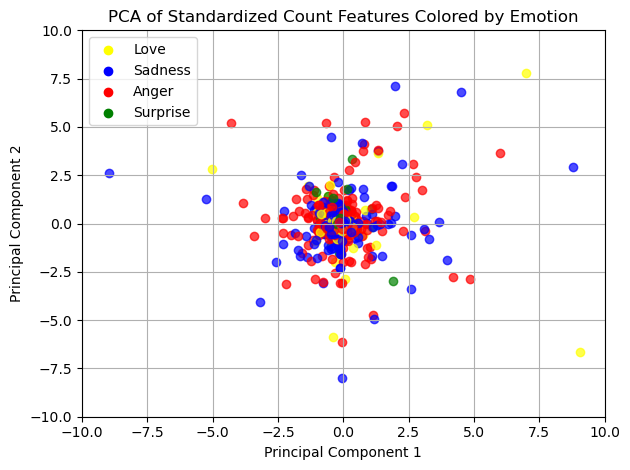

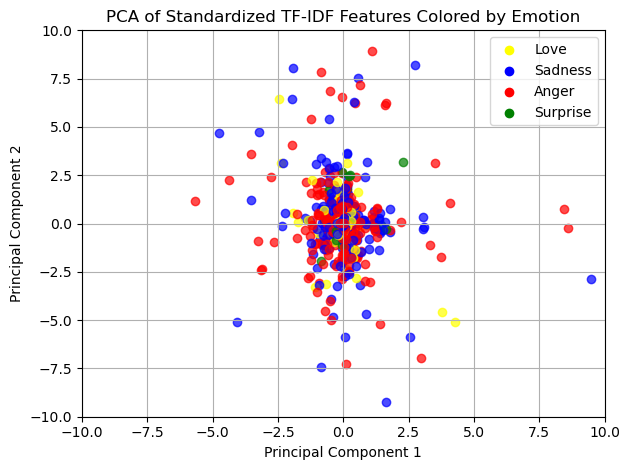

In [3]:
for i in range(count_pca.shape[0]):
    if class_love[i]:
        color = 'yellow'
    elif class_sadness[i]:
        color = 'blue'
    elif class_anger[i]:
        color = 'red'
    elif class_surprise[i]:
        color = 'green'
    else:
        continue 
    
    plt.scatter(count_pca[i, 0], count_pca[i, 1], color=color, alpha=0.7)

plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.title('PCA of Standardized Count Features Colored by Emotion')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.scatter([], [], color='yellow', label='Love')
plt.scatter([], [], color='blue', label='Sadness')
plt.scatter([], [], color='red', label='Anger')
plt.scatter([], [], color='green', label='Surprise')
plt.legend()

plt.grid()
plt.tight_layout()
plt.show()

for i in range(tfidf_pca.shape[0]):
    if class_love[i]:
        color = 'yellow'
    elif class_sadness[i]:
        color = 'blue'
    elif class_anger[i]:
        color = 'red'
    elif class_surprise[i]:
        color = 'green'
    
    plt.scatter(tfidf_pca[i, 0], tfidf_pca[i, 1], color=color, alpha=0.7)

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.title('PCA of Standardized TF-IDF Features Colored by Emotion')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.scatter([], [], color='yellow', label='Love')
plt.scatter([], [], color='blue', label='Sadness')
plt.scatter([], [], color='red', label='Anger')
plt.scatter([], [], color='green', label='Surprise')
plt.legend()

plt.grid()
plt.tight_layout()
plt.show()